# Cumulative Cap
## imports and setup

In [1]:
%run ../../setup.py
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
from import_data import get_data

## file names below

In [2]:
filenames = ['no-behavior.sqlite',
             'ccap-fixed-dormant.sqlite',
             #'ccap-normal-dormant.sqlite',
             'ccap-with-disruption.sqlite',
             'ccap-reduced-rate.sqlite']

## load data

In [3]:
data = {}
for file in filenames:
    (name, file_data) = get_data(file)
    
    file_data['storage_id'] = file_data['agents'].loc[file_data['agents']["Prototype"] == "Storage"]["AgentId"]
    file_data['t_r'] = file_data['transactions'].loc[file_data['transactions']["ReceiverId"] == file_data['storage_id'].item()]
    file_data['t_s'] = file_data['transactions'].loc[file_data['transactions']["SenderId"] == file_data['storage_id'].item()]

    data[name] = file_data

In [4]:
for datum in data:
    print(datum)

no-behavior
ccap-fixed-dormant
ccap-with-disruption
ccap-reduced-rate


In [5]:
for f in data:
    data[f]['t_r']['CumQuant'] = data[f]['t_r']['Quantity'].cumsum()

/tmp/ipykernel_62138/1973137356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f]['t_r']['CumQuant'] = data[f]['t_r']['Quantity'].cumsum()


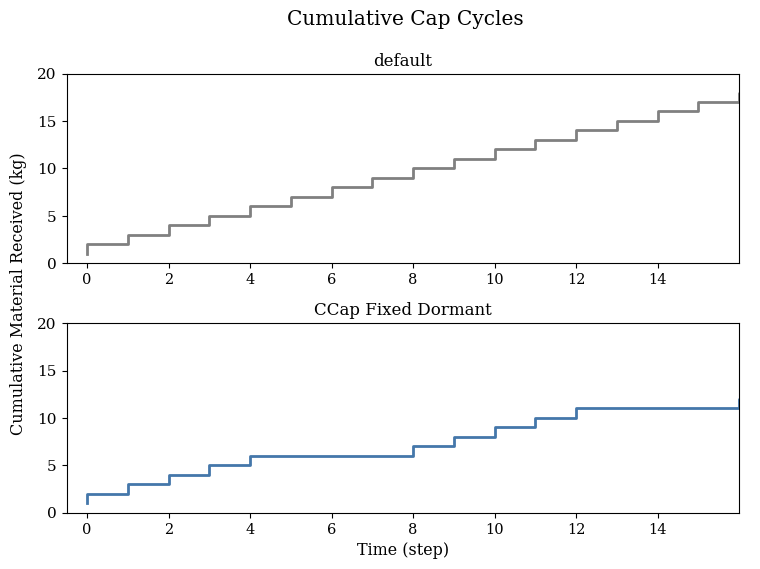

In [6]:
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

ax0 = fig.add_subplot(211)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
plt.xlim(-0.5,16)
plt.ylim(0,20)
ax0.set_xticks(np.arange(0, 16, 2))
ax0.set_yticks(np.arange(0, 25, 5))


ax0.step(data['no-behavior']['t_r']['Time'],
         data['no-behavior']['t_r']['CumQuant'],
         color= '0.5')
ax0.set_title('default')

ax1 = fig.add_subplot(212, sharex=ax0, sharey=ax0)


ax1.step(data['ccap-fixed-dormant']['t_r']['Time'],
         data['ccap-fixed-dormant']['t_r']['CumQuant'],
         color= palette[0])
ax1.set_title('CCap Fixed Dormant')

fig.suptitle('Cumulative Cap Cycles', x=0.55)
fig.tight_layout()

#plt.savefig('plots/cumulative-subplots', transparent=True)


Text(0.5, 1.0, 'Cumulative Cap Behavior')

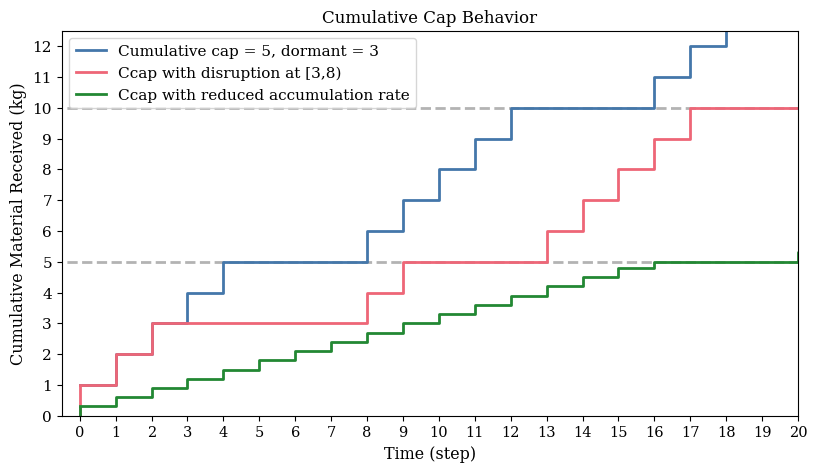

In [13]:
fig = plt.figure(figsize = (9.5, 5))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')

plt.xlim(-0.5,20)
plt.ylim(0,12.5)
ax.set_xticks(np.arange(0, 21, 1))
ax.set_yticks(np.arange(0, 13, 1))


# ax.step(data['no-behavior']['t_r']['Time'],
#         data['no-behavior']['t_r']['CumQuant'],
#         where='post',
#         color= '0.6',
#         label='Default behavior')

ax.hlines(y=[5,10], xmin=-2, xmax=25, colors='0.7', linestyles='dashed')

ax.step(data['ccap-fixed-dormant']['t_r']['Time'],
        data['ccap-fixed-dormant']['t_r']['CumQuant'],
        color= palette[0], where='post',
        label='Cumulative cap = 5, dormant = 3')

ax.step(data['ccap-with-disruption']['t_r']['Time'],
        data['ccap-with-disruption']['t_r']['CumQuant'],
        color= palette[1], where='post',
        label='Ccap with disruption at [3,8)')

ax.vlines(x=0, ymin=0, ymax=1, colors=palette[1])

ax.step(data['ccap-reduced-rate']['t_r']['Time'],
        data['ccap-reduced-rate']['t_r']['CumQuant'],
        color= palette[2], where='post',
        label='Ccap with reduced accumulation rate')

ax.vlines(x=0, ymin=0, ymax=0.3, colors=palette[2])

ax.legend(loc = 'upper left')

plt.title('Cumulative Cap Behavior')

#plt.savefig('plots/cumulative-oneplot', transparent=True)
